# Introduction

For starters we will use ten different actors, denoted by different video id:s.


We will apply LOGO CV (Leave One Group Out cross-validation)

We will later have to take into account variables like mode (prosody or vocalization) and intensity (1-4) in the cross validation scheme. 

However for the first run it will be fine to include all without taking such factors into account.



In [20]:
pwd

'/home/tim/work/su-thesis-project/projects/video_analysis/python'

In [2]:
cd ..

/home/tim/work/su-thesis-project/projects/video_analysis/python


In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from sql_handling.execute_sql import execute_sql_pandas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import scipy

# Paths

In [6]:
# path to save figures
output_path = '/home/tim/work/su-thesis-project/projects/video_analysis/python/notebooks/'

# Global configuration path
glob_conf_path = 'global_config.py'

# Load global variables

In [7]:
exec(open(glob_conf_path).read())

# Select data from DB

We only select data that satisfies following three conditions:

* Success == 1
* Confidence rate >= 0.98
* mix (mixed emotions) = False(0)

In [8]:
query = """SELECT filename,
video_id,
emotion_1,
AU01_r,
AU02_r,
AU04_r,
AU05_r,
AU06_r,
AU07_r,
AU09_r,
AU10_r,
AU12_r,
AU14_r,
AU15_r,
AU17_r,
AU20_r,
AU23_r,
AU25_r,
AU26_r,
AU45_r
FROM openface_reduced
WHERE success = 1 AND confidence >= 0.98 AND mix = 0;"""
df = execute_sql_pandas(query)

In [9]:
df

,filename,video_id,emotion_1,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,A334_ins_p_4,A334,ins,0.00,0.0,0.00,0.00,1.47,1.07,0.0,0.91,2.60,1.01,0.0,0.06,0.0,0.00,0.15,0.00,0.0
1,A334_ins_p_4,A334,ins,0.00,0.0,0.00,0.00,1.31,0.99,0.0,0.77,2.48,0.89,0.0,0.06,0.0,0.00,0.17,0.00,0.0
2,A334_ins_p_4,A334,ins,0.01,0.0,0.00,0.00,1.21,0.95,0.0,0.65,2.31,0.82,0.0,0.09,0.0,0.00,0.12,0.01,0.0
3,A334_ins_p_4,A334,ins,0.07,0.0,0.00,0.00,1.12,0.74,0.0,0.60,2.09,0.69,0.0,0.15,0.0,0.00,0.07,0.20,0.0
4,A334_ins_p_4,A334,ins,0.11,0.0,0.00,0.00,1.04,0.61,0.0,0.60,1.87,0.64,0.0,0.24,0.0,0.00,0.00,0.52,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100675,A334_anx_p_3,A334,anx,0.17,0.0,0.61,0.06,0.17,0.78,0.0,0.95,0.99,0.40,0.0,0.89,0.0,1.33,0.39,1.08,0.0
100676,A334_anx_p_3,A334,anx,0.09,0.0,0.60,0.07,0.19,0.85,0.0,1.00,0.97,0.37,0.0,0.86,0.0,1.31,0.37,1.10,0.0
100677,A334_anx_p_3,A334,anx,0.07,0.0,0.64,0.07,0.16,0.91,0.0,1.01,0.95,0.40,0.0,0.90,0.0,1.29,0.39,1.15,0.0
100678,A334_anx_p_3,A334,anx,0.10,0.0,0.74,0.02,0.15,0.96,0.0,0.96,0.95,0.39,0.0,0.90,0.0,1.29,0.37,1.23,0.0


Total number of instances: 100680

Number of Instances per File (before data cleaning)
A327_ele_v_4         623
A334_sha_v_4         589
A327_anx_v_3         556
A327_bor_v_4         556
A327_conc_v_4        554
                    ... 
A327_bor_p_4          50
A334_exc_p_1          47
A050121-R_adm_v_2     46
A050121-R_adm_v_1     44
A050121-R_adm_p_1     38
Name: filename, Length: 558, dtype: int64



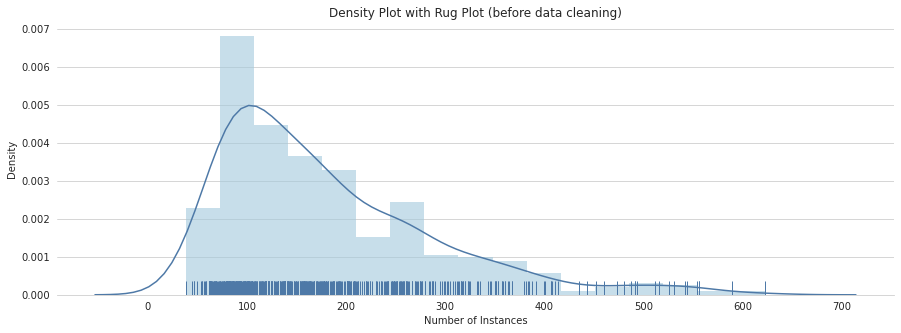


Number of Instances per Video id (before data cleaning)
A334         56712
A327         41586
A050121-R      935
A200           540
A218           266
A102           209
A101           159
A21            142
A103           131
Name: video_id, dtype: int64


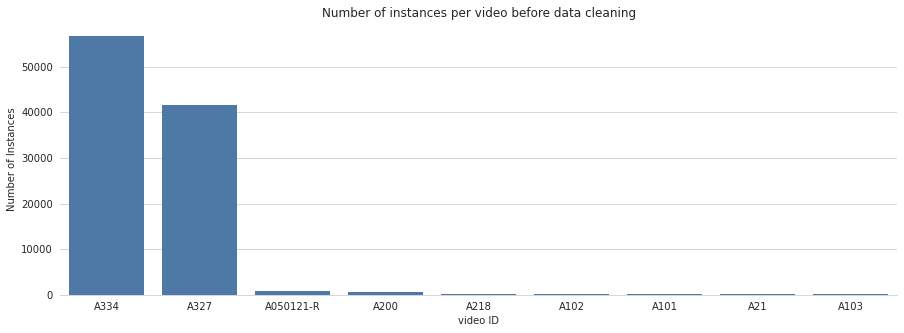


Number of Instances per Emotion (before data cleaning)
dou        3897
bor        3691
gui        3643
ele        3404
anx        3383
emb        3366
conc       3327
ang        3279
ins        3227
cont       3120
disg       3080
awe        3020
det        3009
hop        2977
mov        2861
gra        2818
dist       2805
disa       2749
conf       2732
int        2648
exc        2610
env        2565
amu        2440
fea        2335
adm        2300
hap        2060
sha        1826
scha       1609
sat        1603
sad        1593
pea        1563
ten        1544
reg        1532
nos        1468
pri        1410
rej        1349
ple        1342
neg_sur    1316
sar        1232
rel        1211
neu        1203
pos_sur    1114
tri         419
Name: emotion_1, dtype: int64


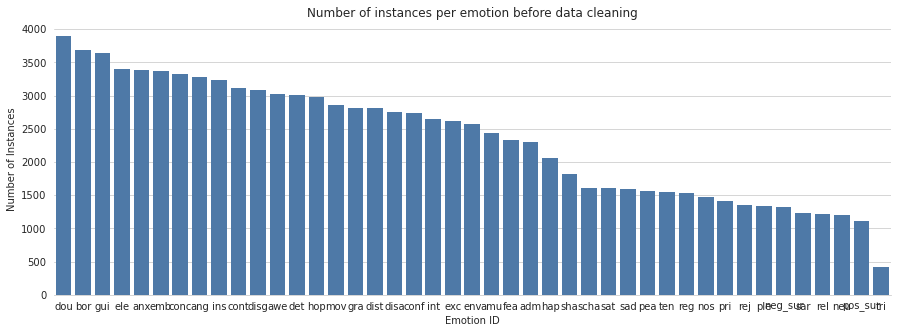

In [10]:
print("Total number of instances: {}".format(len(df)))
print()


print("Number of Instances per File (before data cleaning)")
file_val_counts_original = df["filename"].value_counts()
print(file_val_counts_original)
print()


x = file_val_counts_original.values
plt.figure(figsize=(15,5))
sns.distplot(x, rug=True, norm_hist=True,
             rug_kws={'color': blue_shades[0],'alpha':1},
             kde_kws={'color': blue_shades[0],'alpha':1},
             hist_kws={'color': blue_shades[1], 'alpha':0.6}
            )
plt.xlabel('Number of Instances')
plt.ylabel('Density')
plt.grid(False,axis='x')
plt.savefig(os.path.join(output_path,'charts','report_distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.title('Density Plot with Rug Plot (before data cleaning)')
plt.savefig(os.path.join(output_path,'charts','distribution_before_cleaning.svg'), bbox_inches = 'tight')
plt.show()
print()


print("Number of Instances per Video id (before data cleaning)")
video_val_counts_original = df["video_id"].value_counts()
print(video_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(video_val_counts_original.index, video_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per video before data cleaning")
plt.xlabel('video ID')
plt.ylabel('Number of Instances')
plt.show()
print()


print("Number of Instances per Emotion (before data cleaning)")
emotion_val_counts_original = df["emotion_1"].value_counts()
print(emotion_val_counts_original)
plt.figure(figsize=(15,5))
sns.barplot(emotion_val_counts_original.index, emotion_val_counts_original.values, saturation=sns_saturation, color=blue_rgb)
plt.title("Number of instances per emotion before data cleaning")
plt.xlabel('Emotion ID')
plt.ylabel('Number of Instances')
#plt.xticks(rotation=45)
plt.show()
print()

Lets see how many files we have per video id

In [11]:
print("Number of Instances per video id (before data cleaning)")
video_val_counts_original = df[['video_id','filename']].groupby(["video_id"]).filename.nunique().reset_index()
print(video_val_counts_original)
print()

Number of Instances per video id (before data cleaning)
    video_id  filename
0  A050121-R        14
1       A101         1
2       A102         1
3       A103         1
4       A200         2
5        A21         1
6       A218         1
7       A327       200
8       A334       337



# From time series data to average features

In [12]:
from scipy.signal import find_peaks

def my_find_peaks(x):
    """
    This function takes a 1-D array and finds all local maxima by simple comparison of neighboring values. 
    Optionally, a subset of these peaks can be selected by specifying conditions for a peak’s properties.
    """
    th = x.mean()
    val = x.values
    peaks, _ = find_peaks(val, height=th)
    return len(peaks)

In [13]:
df_tmp = df

# Compute statistical measures 
df_tmp = df_tmp.groupby(['filename']).agg(['mean',                                    # Arithmetic mean
                                          lambda x: scipy.stats.variation(x),        # Coefficient of variation
                                          lambda x: np.percentile(x, q=20),          # 20th percentile, i.e. below this value 20% of the observations will be found
                                          lambda x: np.percentile(x, q=50),          # 50th percentile, i.e. below this value 50% of the observations will be found
                                          lambda x: np.percentile(x, q=80),          # 80th percentile, i.e. below this value 80% of the observations will be found
                                          lambda x: scipy.stats.iqr(x, rng=(20,80)), # IQR(60%) = 80th percentile - 20th percentile
                                          lambda x: my_find_peaks(x),                # Number of peaks above the adaptive threshold
                                          ]).reset_index().sort_values(by=['filename'], ignore_index=True)

# Rename columns
df_tmp.rename(columns={'<lambda_0>': 'stddevNorm',
                       '<lambda_1>': 'percentile20.0',
                       '<lambda_2>': 'percentile50.0',
                       '<lambda_3>': 'percentile80.0',
                       '<lambda_4>': 'iqr60_80-20',
                       '<lambda_5>': 'numPeaks',
                      }, level=1,inplace=True)

# Impute NaN values
# There might be some NaN values in the dataframe coming from the coefficient of variation (std(x)/mean(x) when mean(x)=0) 
df_tmp.fillna(0, inplace=True)

# Collapse hierarchical index in columns
df_tmp.columns = ['_'.join(col).strip('_') for col in df_tmp.columns.values]

/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesis/lib/python3.8/site-packages/scipy/stats/stats.py:1021: RuntimeWarning: invalid value encountered in double_scalars
  return a.std(axis, ddof=ddof) / a.mean(axis)
/home/tim/anaconda3/envs/thesi

In [14]:
df_tmp.isnull().values.any()

False

In [15]:
df_tmp

,filename,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,A050121-R_adm_p_1,0.047368,1.503494,0.0,0.020,0.088,0.088,1,0.025000,1.254046,...,0.652,0.620,3,0.042895,1.016055,0.0,0.03,0.090,0.090,5
1,A050121-R_adm_p_2,0.051449,1.187263,0.0,0.030,0.104,0.104,6,0.027391,2.121172,...,0.584,0.584,8,0.051014,1.302042,0.0,0.02,0.084,0.084,8
2,A050121-R_adm_p_3,0.451067,1.191646,0.0,0.000,1.142,1.142,5,0.043067,1.993472,...,0.678,0.678,8,0.320133,2.043535,0.0,0.04,0.320,0.320,2
3,A050121-R_adm_p_4,0.275325,1.230243,0.0,0.050,0.656,0.656,4,0.044675,1.938180,...,1.238,1.236,8,0.087532,1.541024,0.0,0.01,0.158,0.158,5
4,A050121-R_adm_v_1,0.038864,1.073908,0.0,0.015,0.084,0.084,5,0.039773,2.356469,...,0.338,0.338,5,0.061591,1.353529,0.0,0.01,0.110,0.110,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,A334_ten_v_4,0.154758,1.396107,0.0,0.010,0.370,0.370,12,0.050000,2.009413,...,1.040,1.040,13,0.353145,2.140944,0.0,0.00,0.428,0.428,8
554,A334_tri_p_1,0.245600,1.479431,0.0,0.000,0.580,0.580,2,0.037067,1.782359,...,0.732,0.708,6,0.274800,2.049383,0.0,0.02,0.348,0.348,2
555,A334_tri_p_2,0.138000,2.086705,0.0,0.020,0.150,0.150,6,0.091500,2.308541,...,0.962,0.952,5,0.304000,1.711108,0.0,0.00,0.674,0.674,2
556,A334_tri_p_3,0.920687,1.275583,0.0,0.000,2.470,2.470,6,0.150153,1.992978,...,1.190,1.190,9,0.221450,1.614280,0.0,0.01,0.470,0.470,7


# Normalize training set

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

In [16]:
from sklearn import preprocessing

X = df_tmp.drop(columns=['filename'])              # Get features from training set
min_max_scaler = preprocessing.MinMaxScaler()                                   # Video min max scaler
X_scaled = min_max_scaler.fit_transform(X)                                      # Fit and transform features
X_scaled_df = pd.DataFrame(data=X_scaled, columns=X.columns.to_list())          # Create a dataframe from normalized features

In [17]:
X_scaled_df

,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks,AU02_r_mean,AU02_r_stddevNorm,AU02_r_percentile20.0,...,AU26_r_percentile80.0,AU26_r_iqr60_80-20,AU26_r_numPeaks,AU45_r_mean,AU45_r_stddevNorm,AU45_r_percentile20.0,AU45_r_percentile50.0,AU45_r_percentile80.0,AU45_r_iqr60_80-20,AU45_r_numPeaks
0,0.018859,0.356600,0.0,0.2500,0.014772,0.014772,0.000000,0.023311,0.000000,0.0,...,0.168568,0.161087,0.016393,0.002471,0.000000,0.0,0.6,0.005949,0.005949,0.113636
1,0.022358,0.128057,0.0,0.3750,0.019910,0.019910,0.111111,0.028791,0.445194,0.0,...,0.147022,0.149716,0.098361,0.009403,0.120323,0.0,0.4,0.004164,0.004164,0.181818
2,0.365022,0.131224,0.0,0.0000,0.353243,0.353243,0.088889,0.064713,0.379631,0.0,...,0.176806,0.179406,0.098361,0.239148,0.432293,0.0,0.8,0.074360,0.074360,0.045455
3,0.214327,0.159119,0.0,0.6250,0.197174,0.197174,0.066667,0.068399,0.351243,0.0,...,0.354246,0.355654,0.098361,0.040578,0.220870,0.0,0.2,0.026175,0.026175,0.113636
4,0.011566,0.046134,0.0,0.1875,0.013487,0.013487,0.088889,0.057165,0.565999,0.0,...,0.069075,0.072015,0.049180,0.018432,0.141986,0.0,0.2,0.011898,0.011898,0.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,0.110943,0.278990,0.0,0.1250,0.105331,0.105331,0.244444,0.080601,0.387816,0.0,...,0.291508,0.293746,0.180328,0.267329,0.473275,0.0,0.0,0.106484,0.106484,0.181818
554,0.188838,0.339210,0.0,0.0000,0.172768,0.172768,0.022222,0.050963,0.271243,0.0,...,0.193916,0.188882,0.065574,0.200447,0.434753,0.0,0.4,0.082689,0.082689,0.045455
555,0.096574,0.778092,0.0,0.2500,0.034682,0.034682,0.111111,0.175703,0.541392,0.0,...,0.266793,0.265951,0.049180,0.225375,0.292430,0.0,0.0,0.179655,0.179655,0.045455
556,0.767712,0.191887,0.0,0.0000,0.779705,0.779705,0.111111,0.310112,0.379377,0.0,...,0.339037,0.341124,0.114754,0.154903,0.251692,0.0,0.2,0.118977,0.118977,0.159091


In [18]:
df_tmp[['AU01_r_mean',
'AU01_r_stddevNorm',
'AU01_r_percentile20.0',
'AU01_r_percentile50.0',
'AU01_r_percentile80.0',
'AU01_r_iqr60_80-20',
'AU01_r_numPeaks']]

,AU01_r_mean,AU01_r_stddevNorm,AU01_r_percentile20.0,AU01_r_percentile50.0,AU01_r_percentile80.0,AU01_r_iqr60_80-20,AU01_r_numPeaks
0,0.047368,1.503494,0.0,0.020,0.088,0.088,1
1,0.051449,1.187263,0.0,0.030,0.104,0.104,6
2,0.451067,1.191646,0.0,0.000,1.142,1.142,5
3,0.275325,1.230243,0.0,0.050,0.656,0.656,4
4,0.038864,1.073908,0.0,0.015,0.084,0.084,5
...,...,...,...,...,...,...,...
553,0.154758,1.396107,0.0,0.010,0.370,0.370,12
554,0.245600,1.479431,0.0,0.000,0.580,0.580,2
555,0.138000,2.086705,0.0,0.020,0.150,0.150,6
556,0.920687,1.275583,0.0,0.000,2.470,2.470,6


In [19]:
df_tmp.isnull().values.any()

False